<a href="https://colab.research.google.com/github/pingao2019/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Pingao_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!
import numpy as np
from scipy.stats import chisquare  # One-way chi square test
import pandas as pd
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data", header=None)
print(df.shape)
df.head()



(435, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime',
                          'duty-free', 'south-africa'],
                 na_values="?")
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
df= df.replace({'y':1,'n':0})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


Confidence Intervals:
Generate and numerically represent a confidence interval
Graphically (with a plot) represent the confidence interval
Interpret the confidence interval - what does it tell you about the data and its distribution?

In [0]:
rep=df[df['party']=='republican']
rep.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [0]:
dem=df[df['party']=='democrat']
dem.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [0]:
from scipy.stats import ttest_ind, ttest_ind_from_stats,ttest_rel
 

In [0]:
col= rep['water-project']
rep_water_project_no_nans=col[-np.isnan(col)]
col= dem['water-project']
dem_water_project_no_nans=col[-np.isnan(col)]
print(len(rep_water_project_no_nans))
print(len(dem_water_project_no_nans))


ttest_ind(rep['water-project'], dem['water-project'],nan_policy='omit')


148
239


Ttest_indResult(statistic=0.08896538137868286, pvalue=0.9291556823993485)

In [0]:
print(rep_water_project_no_nans.mean())
print(dem_water_project_no_nans.mean())



0.5067567567567568
0.502092050209205


1) null hypothesis : rep and dem have no difference on voting water project bill.
2) pvalue =0.9291556823993485>.05, so reject null hypothesis, their voting is different. 3)from mean value we can see the difference.

In [0]:
dem.apply(pd.Series.value_counts).T

,0.0,1.0,democrat
party,NaN,NaN,267.0
handicapped-infants,102.0,156.0,NaN
water-project,119.0,120.0,NaN
budget,29.0,231.0,NaN
physician-fee-freeze,245.0,14.0,NaN
el-salvador-aid,200.0,55.0,NaN
religious-groups,135.0,123.0,NaN
anti-satellite-ban,59.0,200.0,NaN
aid-to-contras,45.0,218.0,NaN
mx-missile,60.0,188.0,NaN


In [0]:
# Null Hypothesis that replicates support is 0 on water project.
from scipy import stats
#stats.ttest_1samp(dem['water-project'], 0, nan_policy='omit')
stats.ttest_1samp(dem_water_project_no_nans,0, nan_policy='omit')

Ttest_1sampResult(statistic=15.49193338482967, pvalue=6.63384665032051e-38)

1) null hypothesis:    all democrats did not vote for water project bill.

2} from 1 sample test, pvalue=6.633846650320544e-38 < .01

3)so rejecting the null hypothesis, so there are some  democrates voting for this bill. 

In [0]:
dem_water_project_no_nans.mean()

# from result below, almost half democrates vote for the bill.

0.502092050209205

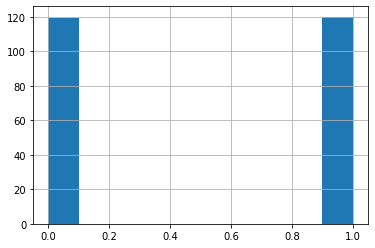

In [0]:
dem['water-project'].hist()

In [0]:
df.apply(pd.Series.value_counts).T

,0.0,1.0,democrat,republican
party,NaN,NaN,267.0,168.0
handicapped-infants,236.0,187.0,NaN,NaN
water-project,192.0,195.0,NaN,NaN
budget,171.0,253.0,NaN,NaN
physician-fee-freeze,247.0,177.0,NaN,NaN
el-salvador-aid,208.0,212.0,NaN,NaN
religious-groups,152.0,272.0,NaN,NaN
anti-satellite-ban,182.0,239.0,NaN,NaN
aid-to-contras,178.0,242.0,NaN,NaN
mx-missile,206.0,207.0,NaN,NaN


In [0]:
import scipy.stats as stats
 
def confidence_interval(data, confidence=0.95):
  
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
   
  s = np.std(data, ddof=1)  
  stderr = s / np.sqrt(n)
  margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - margin_of_error, mean + margin_of_error)

  

In [0]:
sample_means = []
for x in range(0, 3000):
  coinflips = np.random.binomial(n=1, p=.5, size=12)
  sample_means.append(coinflips.mean())

print(len(sample_means))
print(sample_means)

In [0]:
i = 10
for sample in [t_df10, t_df100, t_df1000]:
    print(f"t - distribution with {i} degrees of freedom")
    print("---" * 10)
    print(f"Mean: {sample.mean()}")
    print(f"Standard Deviation: {sample.std()}")
    print(f"Variance: {sample.var()}")
    i = i*10

In [0]:
sample_means_small = []
sample_means_large = []
for x in range(0,1000):
  coinflips_small = np.random.binomial(n=1, p=.5, size=15)
  coinflips_large = np.random.binomial(n=1, p=.5, size=200)
  one_small_sample = coinflips_small
  one_small_large = coinflips_large
  sample_means_small.append(coinflips_small.mean())
  sample_means_large.append(coinflips_large.mean())


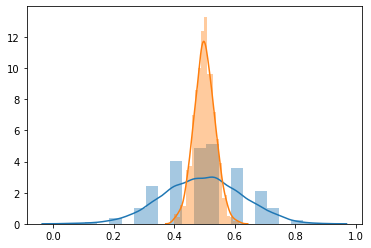

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
fix, ax = plt.subplots()
for sample in [sample_means_small, sample_means_large]:
  sns.distplot(sample)

Larger sample size has more stands for population. 

In [0]:
confidence_interval(sample_means_small)

(0.4931333333333333, 0.4852025534520502, 0.5010641132146164)

In [0]:
 confidence_interval(sample_means_large)

(0.500005, 0.4978439838055815, 0.5021660161944186)

In [0]:
import numpy as np
from scipy.stats import t, ttest_1samp
coinflip_means = []
for x in range(0,100):
  coinflips = np.random.binomial(n=1, p=.5, size=30)
  coinflip_means.append(coinflips.mean())

print(coinflip_means)

[0.7, 0.5, 0.4666666666666667, 0.4666666666666667, 0.6, 0.6, 0.36666666666666664, 0.5, 0.4666666666666667, 0.6333333333333333, 0.5666666666666667, 0.5333333333333333, 0.4, 0.5333333333333333, 0.43333333333333335, 0.5333333333333333, 0.4666666666666667, 0.6, 0.4666666666666667, 0.36666666666666664, 0.6, 0.5, 0.43333333333333335, 0.5333333333333333, 0.4, 0.43333333333333335, 0.5333333333333333, 0.5, 0.23333333333333334, 0.43333333333333335, 0.6, 0.5333333333333333, 0.5333333333333333, 0.4666666666666667, 0.6666666666666666, 0.4, 0.43333333333333335, 0.3333333333333333, 0.43333333333333335, 0.26666666666666666, 0.5, 0.4666666666666667, 0.4666666666666667, 0.5333333333333333, 0.6333333333333333, 0.4666666666666667, 0.36666666666666664, 0.5, 0.4666666666666667, 0.5, 0.6, 0.43333333333333335, 0.5333333333333333, 0.6333333333333333, 0.5333333333333333, 0.4666666666666667, 0.4666666666666667, 0.5666666666666667, 0.6, 0.4666666666666667, 0.6, 0.4666666666666667, 0.6, 0.5666666666666667, 0.53333

In [0]:
n = len(coinflip_means)
 
dof = n-1
 
mean = np.mean(coinflip_means)
 
sample_std = np.std(coinflip_means, ddof=1)
 
std_err = sample_std/n**.5

CI = t.interval(.95, dof, loc=mean, scale=std_err)
print("95% Confidence Interval: ", CI)

95% Confidence Interval:  (0.4848440229741009, 0.5224893103592323)


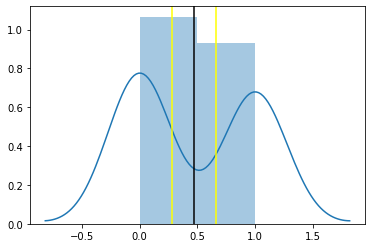

In [0]:
import seaborn as sns

sns.distplot(coinflips)
CI = confidence_interval(coinflips)
plt.axvline(x=CI[1], color='yellow')
plt.axvline(x=CI[2], color='yellow')
plt.axvline(x=CI[0], color='black');

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
fix, ax = plt.subplots()
for sample in [sample_means_small, sample_means_large]:
  sns.distplot(sample)

In [0]:
table = np.array([[18,39,56],
                            [78,45,64],
                            [26,34,39]])

chi_2_stat, p_value, dof, expected = stats.chi2_contingency(table)

print("Chi^2 Statistic", chi_2_stat)


Chi^2 Statistic 23.88946317383397




H0 : There is no statistically significant relationship between gender and working hours per week.

Ha : There is a statistically significant relationship between gender and working hours per week.


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)